In [1]:
%pip install scipy
%pip install Pillow
import numpy as np
import scipy as sc
from PIL import Image

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1. Chargement et affichage de l'image

JPEG (225, 225) RGB


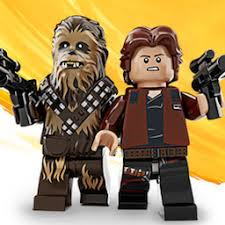

In [164]:
img = Image.open("solo.jpeg")
print(img.format,img.size,img.mode)
display(img)

## 2. Affichage d'un pixel et obtention de la couleur d'un pixel

position du pixel dans l'image : ligne 50  colonne 110
valeurs (r g b) du pixel choisi : 98 73 43


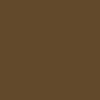

In [168]:
i=50
j=110
r,g,b = img.getpixel((i,j))
print("position du pixel dans l'image : ligne",i," colonne", j)
print("valeurs (r g b) du pixel choisi :", r,g,b)
pixel = Image.new("RGB",(1,1),(r,g,b))
scaled_pixel = pixel.resize((100, 100), Image.NEAREST)
display(scaled_pixel)

## 3. Modification de la couleur d'un pixel

La matrice $G$ permettant de passer d'un pixel au pixel gris correspondant est 
$$ G = \begin{pmatrix} 0.2126 & 0.7152 & 0.0722 \end{pmatrix}$$

G = [[0.2126 0.7152 0.0722]
 [0.2126 0.7152 0.0722]
 [0.2126 0.7152 0.0722]]
valeur r g b du pixel après transformation en gris : 76 76 76


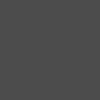

In [171]:
# On définit la matrice G comme un tableau de dimension 2
G = np.array([[0.2126,0.7152,0.0722],[0.2126,0.7152,0.0722],[0.2126,0.7152,0.0722]])
print("G =", G)
# on récupère les valeurs r g b du pixel au format vecteur
pixel_array = np.array([r,g,b])
# multiplication matricielle. On arrondit les entrées du vecteur pour ne garder que des entiers.
pixel_array_gris = np.dot(G,pixel_array).astype(int) 
print("valeur r g b du pixel après transformation en gris :", pixel_array_gris[0],pixel_array_gris[1],pixel_array_gris[2] )
# On affiche le pixel obtenu (en le grossissant). 
pixel_gris = Image.new("RGB",(1,1),(pixel_array_gris[0],pixel_array_gris[1],pixel_array_gris[2]))
scaled_pixel_gris = pixel_gris.resize((100, 100), Image.NEAREST)
display(scaled_pixel_gris)

valeur r g b du pixel après transformation en sepia : 102 91 71


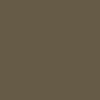

In [172]:
S = np.array([[0.393,0.769,0.189],[0.349,0.686,0.168],[0.272,0.534,0.131]])
# multiplication matricielle. On arrondit les entrées du vecteur pour ne garder que des entiers.
pixel_array_sepia = np.dot(S,pixel_array).astype(int) 
print("valeur r g b du pixel après transformation en sepia :", pixel_array_sepia[0],pixel_array_sepia[1],pixel_array_sepia[2] )
# On affiche le pixel obtenu (en le grossissant). 
pixel_sepia = Image.new("RGB",(1,1),(pixel_array_sepia[0],pixel_array_sepia[1],pixel_array_sepia[2]))
scaled_pixel_sepia = pixel_sepia.resize((100, 100), Image.NEAREST)
display(scaled_pixel_sepia)

## 4. Modification de tous les pixels de l'image

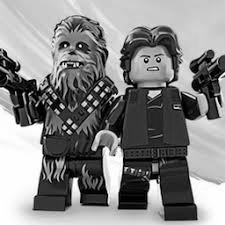

In [173]:
for i in range(0,225):
    for j in range(0,225):
        r,g,b = img.getpixel((i,j))
        pixel_array = np.array([r,g,b])
        pixel_array_gris = np.dot(G,pixel_array).astype(int) 
        img_gris = img
        img_gris.putpixel((i,j),(pixel_array_gris[0],pixel_array_gris[1],pixel_array_gris[2]))
display(img_gris)
        

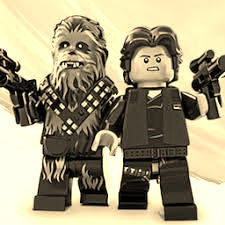

In [174]:
for i in range(0,225):
    for j in range(0,225):
        r,g,b = img.getpixel((i,j))
        pixel_array = np.array([r,g,b])
        pixel_array_sepia = np.dot(S,pixel_array).astype(int) 
        img_sepia = img
        img_sepia.putpixel((i,j),(pixel_array_sepia[0],pixel_array_sepia[1],pixel_array_sepia[2]))
display(img_sepia)

## 5. Déterminer un élément du noyau de $S$

Si on demande à python de calculer le noyau de $S$ il nous dira que ce noyau est réduit à $0$ car la matrice $S$ est inversible. Cela vient du fait que dans l'algorithme de Gauss appliqué à $S$, la dernière ligne n'est pas exactement nul, elle contient un élément d'une valeur de 0.000001. En pratique cela signifie que si la précision qui nous intéresse est celle des entiers (ce qui est le cas puisque les couleurs des pixels sont des valeurs entières) cette matrice va se comporter comme une matrice non-inversible à la précision qui nous intéresse. Nous allons donc remplacer la matrice $S$ par la matrice $S_{\text{low}\textunderscore \text{rank}}$ très proche mais qui donne bien une ligne exactement nulle (avec une précision infinie) lors du pivot de Gauss. On trouve alors le noyau de $S_{\text{low}\textunderscore \text{rank}}$. 
$$ \mathrm{ker}\left(S_{\text{low}\textunderscore \text{rank}}\right) = \mathrm{Vect}\left( \begin{pmatrix} -37 \\ -4 \\ 93\end{pmatrix}\right)$$
Remarque : à nouveau, nous avons arrondi le vecteur du noyau car nous n'avons pas besoin d'une précision infinie (les valeurs r,g,b des pixels doivent être entières). 

In [184]:
# Remplacer S par une matrice très proche non-inversible qu'on appelle S_low_rank
eig = np.linalg.eig(S);
P = eig.eigenvectors;
D = np.diag(eig.eigenvalues);
D[2,2] = 0
S_low_rank = np.linalg.matmul(P,np.linalg.matmul(D,np.linalg.inv(P)));

# Déterminer le noyau de S_low_rank et arrondir le vecteur de ce noyau pour avoir des valeurs entières. 
print("matrice S : ", "\n", S)
print("matrice S_low_rank", "\n", S_low_rank)
ker = P[:,2];
ker_simplified = (100*ker).astype(int)
print("On vérifie que S_low_rank multiplié par le vecteur du noyau donne le vecteur nul", np.dot(S_low_rank,ker))
print("On vérifie que S_low_rank multiplié par le vecteur arrondi du noyau donne un vecteur proche du vecteur nul",np.dot(S_low_rank,ker_simplified))
print("Le noyau (simplifié) est engendré par : ", ker_simplified)

matrice S :  
 [[0.393 0.769 0.189]
 [0.349 0.686 0.168]
 [0.272 0.534 0.131]]
matrice S_low_rank 
 [[0.39299409 0.76898106 0.18903283]
 [0.34899937 0.68599797 0.16800353]
 [0.27201486 0.53404764 0.1309174 ]]
On vérifie que S_low_rank multiplié par le vecteur du noyau donne le vecteur nul [-2.64728710e-17 -2.34277770e-17 -1.02446795e-17]
On vérifie que S_low_rank multiplié par le vecteur arrondi du noyau donne un vecteur proche du vecteur nul [0.93628975 0.83435338 0.64972315]
On vérifie que S_low_rank multiplié par le vecteur arrondi du noyau donne un vecteur proche du vecteur nul [-6.34383947 -5.65787534 -4.40491985]
Le noyau (simplifié) est engendré par :  [-36  -3  92]


## 6. Construire deux pixels $p$ et $p'$ tels que $Sp = Sp'$ 

[ 64  12 132]
couleur du pixel 1 : 


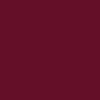

couleur du pixel 2 : 


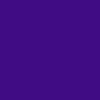

couleur du pixel 1 après transformatione en sepia 


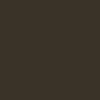

couleur du pixel 2 après transformation en sepia : 


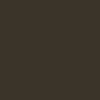

In [176]:
ker_simplified = (100*ker).astype(int)
p1 = [100,15,40]
p2 = p1 + ker_simplified
print(p2)

pixel1 = Image.new("RGB",(1,1),(p1[0],p1[1],p1[2]))
scaled_pixel1 = pixel1.resize((100, 100), Image.NEAREST)
print("couleur du pixel 1 : ")
display(scaled_pixel1)

pixel2 = Image.new("RGB",(1,1),(p2[0],p2[1],p2[2]))
scaled_pixel2 = pixel2.resize((100, 100), Image.NEAREST)
print("couleur du pixel 2 : ")
display(scaled_pixel2)

p1_sepia = np.dot(S,p1).astype(int)
p2_sepia = np.dot(S,p2).astype(int)

pixel1_sepia = Image.new("RGB",(1,1),(p1_sepia[0],p1_sepia[1],p1_sepia[2]))
scaled_pixel1_sepia = pixel1_sepia.resize((100, 100), Image.NEAREST)
print("couleur du pixel 1 après transformatione en sepia ")
display(scaled_pixel1_sepia)

pixel2_sepia = Image.new("RGB",(1,1),(p2_sepia[0],p2_sepia[1],p2_sepia[2]))
scaled_pixel2_sepia = pixel2_sepia.resize((100, 100), Image.NEAREST)
print("couleur du pixel 2 après transformation en sepia : ")
display(scaled_pixel2_sepia)


## 7. Construire une image qui devient uniforme quand on lui applique la transfo sepia

[[ 1  0  0 ...  0 -1 -1]
 [ 1 -1  0 ...  0 -2 -1]
 [-2  1 -1 ...  0 -1  1]
 ...
 [-1 -1 -2 ...  1  1 -2]
 [-1 -1  0 ...  0 -2  1]
 [-1 -1 -2 ...  0  0 -2]]
None (255, 255) RGB


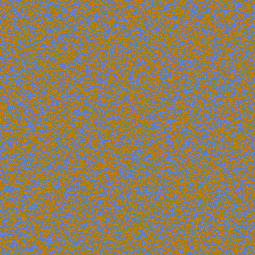

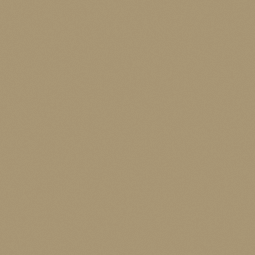

In [178]:
premier_pixel = np.array([125,125,125])
coefficients_aleatoire = np.random.randint(-2,2,(255,255))
print(coefficients_aleatoire)
pixels = np.zeros((255,255,3))
img_unif1 = Image.new("RGB",(255,255))
print(img_unif1.format,img_unif1.size,img_unif1.mode)

for i in range(255):
    for j in range(255): 
        pixels[i,j] = premier_pixel + coefficients_aleatoire[i,j]*ker_simplified
        img_unif1.putpixel((i,j),(pixels[i,j,0].astype(int),pixels[i,j,1].astype(int),pixels[i,j,2].astype(int)))

display(img_unif1)


pixels_sepia = np.zeros((255,255,3))
img_unif1_sepia = Image.new("RGB",(255,255))

for i in range(255):
    for j in range(255): 
        pixels_sepia[i,j] = np.dot(S,pixels[i,j]).astype(int)
        img_unif1_sepia.putpixel((i,j),(pixels_sepia[i,j,0].astype(int),pixels_sepia[i,j,1].astype(int),pixels_sepia[i,j,2].astype(int)))

display(img_unif1_sepia)

In [209]:
def distance(p1, p2):
    return np.linalg.norm(p1-p2)

In [245]:
def closest_pixel(p, pixels):
    min_distance = 1000000
    select_pixel = np.array([0,0,0])
    for i in range(np.shape(pixels)[0]):
        if (distance(p, pixels[i]) < min_distance):
            min_distance = distance(p, pixels[i])
            select_pixel = pixels[i]
    return select_pixel

closest_pixel(p1,np.array([p1,p2,p3]))

def sepia_transform(img):
    pixels_sepia = np.zeros((225,225,3))
    img_unif1_sepia = Image.new("RGB",(225,225))
    for i in range(225):
        for j in range(225): 
            r,g,b = img.getpixel((i,j))
            pixels_sepia[i,j] = np.dot(S,np.array([r,g,b]))
            img_unif1_sepia.putpixel((i,j),(pixels_sepia[i,j,0].astype(int),pixels_sepia[i,j,1].astype(int),pixels_sepia[i,j,2].astype(int)))
    return img_unif1_sepia
    

[153  94 199]


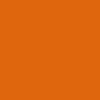

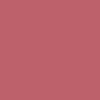

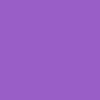

In [237]:
p1 = np.array([225, 100, 15])
p2 = p1 + ker_simplified
p3 = p1 + 2*ker_simplified

print(p3)

pixel_p1 = Image.new("RGB",(1,1),(p1[0],p1[1],p1[2]))
scaled_pixel_p1 = pixel_p1.resize((100, 100), Image.NEAREST)
display(scaled_pixel_p1)

pixel_p2 = Image.new("RGB",(1,1),(p2[0],p2[1],p2[2]))
scaled_pixel_p2 = pixel_p2.resize((100, 100), Image.NEAREST)
display(scaled_pixel_p2)

pixel_p3 = Image.new("RGB",(1,1),(p3[0],p3[1],p3[2]))
scaled_pixel_p3 = pixel_p3.resize((100, 100), Image.NEAREST)
display(scaled_pixel_p3)

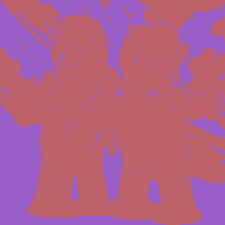

In [246]:
img_unif2_sepia = Image.new("RGB",(225,225))
for i in range(225):
    for j in range(225):
        r,g,b = img.getpixel((i,j))
        p = np.array([r,g,b])
        closest_p = closest_pixel(p,np.array([p1,p2,p3]))
        img_unif2_sepia.putpixel((i,j),(closest_p[0],closest_p[1],closest_p[2]))
        
        
display(img_unif2_sepia)

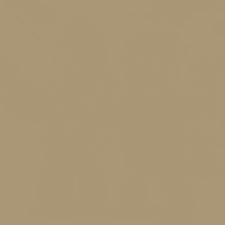

In [247]:
display(sepia_transform(img_unif2_sepia))